# **Proposta de Trabalho - Mineração de dados**

### **Professores:** Wagner Meira Jr./Pedro Calais
### **Aluno 1:** Giovanna Paranhos
### **Matrícula 1:** 2023655476
### **Aluno 2:** Samir Saliba
### **Matrícula 1:** 2022685118

### **Tema:** Classificação em Dados Parametrizados de Biópsias de Câncer de Mama Canino
### **Base de dados:** [Google Drive](https://drive.google.com/drive/folders/1qeFJoe3Xb6XheJ91ynMauPMv-nh1_Wt6?usp=share_link)

## **1. Business Understanding**

Link para a sessão: [OpenAI](https://chat.openai.com/share/cd93fa53-6612-400e-8c1e-bb373611f545)

Business Understanding Phase for Cancer Subtype Classification Task (CRISP-DM):

1. **Project Objectives:**
   - The primary goal is to classify different subtypes of cancer based on biopsy features. Example: "To develop a machine learning model that accurately classifies different subtypes of mammary cancer in dogs using features extracted from biopsy data."

2. **Stakeholder Involvement:**
   - Engage with stakeholders such as veterinarians, researchers, and potentially pharmaceutical companies or organizations involved in canine cancer research.

3. **Business Success Criteria:**
   - Define success criteria, which could include achieving high classification accuracy for each cancer subtype, identifying key features indicative of specific subtypes, and potentially enabling personalized treatment strategies based on subtype classification.

4. **Data Mining Problem Definition:**
   - Clearly define the data mining problem: "To classify mammary cancer subtypes in dogs using machine learning techniques, based on features extracted from biopsy data."

5. **Data Mining Goals:**
   - Specify goals such as developing a robust and accurate classification model, identifying the most relevant features for subtype differentiation, and potentially exploring the model's interpretability for insights into the characteristics of different subtypes.

6. **Preliminary Plan:**
   - Outline a plan that includes data collection, preprocessing, exploration of subtype-specific features, model selection, and evaluation. Consideration may also be given to methods for interpreting the model's decisions.

7. **Resource Assessment:**
   - Identify the necessary resources, including a diverse and representative dataset with labeled cancer subtypes, computational resources for model training, and expertise in both cancer biology and machine learning.

8. **Risks and Contingencies:**
   - Anticipate risks, such as imbalanced subtype representation in the dataset, potential misclassifications, or challenges in obtaining comprehensive biopsy data. Develop contingency plans to address these risks.

9. **Initial Data Collection:**
   - Acquire an initial dataset containing biopsy features with labeled cancer subtypes. Understand the source, quality, and potential biases in the data.

10. **Ethical Considerations:**
    - Consider ethical implications related to the use of sensitive medical data. Ensure compliance with ethical guidelines and regulations, and establish protocols for data anonymization and protection.

11. **Project Plan Approval:**
    - Present the preliminary plan to stakeholders for approval, ensuring alignment with business objectives. Incorporate feedback and make necessary adjustments before proceeding to the next phases of the data mining process.

By thoroughly understanding the business context and objectives in the Cancer Subtype Classification task, you set the stage for a targeted and effective data mining process that addresses the specific challenges and goals of classifying different cancer subtypes in dogs.

## **2. Data understanding (Entendimento dos dados)**

Link para a sessão: [OpenAI](https://chat.openai.com/share/9bb9f816-e8f0-47ad-90bb-471b6b723c53)

Nesta fase, o objetivo é carregar os dados e fazer um entendimento preliminar de suas características. Por brevidade, utilizamos o mesmo código para carregamento dos dados que foi gerado pela LLM no tp anterior.

In [1]:
# INICIO CODIGO MANUAL
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd

data_directory = 'data'




# Get a list of all files in the data directory
files = os.listdir(data_directory)

# Create an empty list to store all DataFrames
all_data = []

# Load all samples
for file in files:
    file_path = os.path.join(data_directory, file)
    df = pd.read_excel(file_path)
    df['type'] = os.path.splitext(file)[0]  # Extract filename without extension
    all_data.append(df)

# Concatenate all DataFrames
combined_df = pd.concat(all_data, ignore_index=True)
df = combined_df.drop(['Unnamed: 0', 'File'], axis=1)

# Display the first few rows of the concatenated DataFrame
print("Concatenated Data:")
print(df.info())

# FIM CODIGO MANUAL

Concatenated Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Cell Segment Area                  1384 non-null   float64
 1   Cell Segment Circularity           1384 non-null   float64
 2   Cell Segment Coverage              1384 non-null   float64
 3   Cell Segment Eccentricity          1384 non-null   float64
 4   Cell Segment PL Angle SDI          1384 non-null   float64
 5   Cell Segment PL Coherence          1384 non-null   float64
 6   Cell Segment PL Entropy            1384 non-null   float64
 7   Cell Segment PL Local Coherence    1384 non-null   float64
 8   Cell Segment PL Mean               1384 non-null   float64
 9   Cell Segment PL STD                1384 non-null   float64
 10  Fibre Angle SDI                    1384 non-null   float64
 11  Fibre Network Connectivity         13

#### 2.1. Estatisticas descritivas

Para compreender a tendência central e espalhamento dos dados, geramos estatísticas descritivas para as colunas numéricas - média, mediana, desvio padrão, mínimo e máximo.

Também exploramos a variável categórica (tipo) ao contar seus valores únicos.

In [2]:
import pandas as pd

# Descriptive statistics for numerical columns
desc_stats = df.describe()

# Count of unique values for categorical variables
unique_counts = df['type'].value_counts()

# Check for missing values
missing_values = df.isnull().sum()

# Class distribution
class_distribution = df['type'].value_counts()

# Display results
print("Descriptive Statistics:")
print(desc_stats)


Descriptive Statistics:
       Cell Segment Area  Cell Segment Circularity  Cell Segment Coverage  \
count        1384.000000               1384.000000            1384.000000   
mean        92173.085126                  0.192294               0.645408   
std         52119.539336                  0.107248               0.116908   
min          3387.853887                  0.039037               0.164467   
25%         49359.776601                  0.119402               0.573394   
50%         85962.073574                  0.160753               0.656033   
75%        128892.458764                  0.232335               0.727600   
max        231366.075190                  0.735709               0.912773   

       Cell Segment Eccentricity  Cell Segment PL Angle SDI  \
count                1384.000000                1384.000000   
mean                    0.737752                   0.013026   
std                     0.151025                   0.007428   
min                     0.0500

In [3]:
print("\nCount of Unique Values for 'type':")
print(unique_counts)


Count of Unique Values for 'type':
type
cmp       438
cs        347
ctmsm     290
normal    166
css       143
Name: count, dtype: int64


#### 2.2. Valores vazios
Aqui, verificamos se existe algum valor vazio, a fim de analisar estratégias para lidar com eles. Como não existe nenhum valor vazio, nenhuma estratégia é necessária.

In [4]:
print("\nMissing Values:")
print(missing_values)


Missing Values:
Cell Segment Area                    0
Cell Segment Circularity             0
Cell Segment Coverage                0
Cell Segment Eccentricity            0
Cell Segment PL Angle SDI            0
Cell Segment PL Coherence            0
Cell Segment PL Entropy              0
Cell Segment PL Local Coherence      0
Cell Segment PL Mean                 0
Cell Segment PL STD                  0
Fibre Angle SDI                      0
Fibre Network Connectivity           0
Fibre Network Cross-Link Density     0
Fibre Network Degree                 0
Fibre Network Eigenvalue             0
Fibre Segment Area                   0
Fibre Segment Circularity            0
Fibre Segment Coverage               0
Fibre Segment Eccentricity           0
Fibre Segment SHG Angle SDI          0
Fibre Segment SHG Coherence          0
Fibre Segment SHG Entropy            0
Fibre Segment SHG Local Coherence    0
Fibre Segment SHG Mean               0
Fibre Segment SHG STD                0
Mean Fib

#### 2.3. Distribuição entre classes
Exploramos o balanceamento entre classes contando seus valores únicos. Vemos que a distribuição é heterogênea, com uma quantidade de amostras do tipo 'cmp' significativamente maior que as demais.

In [5]:

print("\nClass Distribution:")
print(class_distribution)


Class Distribution:
type
cmp       438
cs        347
ctmsm     290
normal    166
css       143
Name: count, dtype: int64


#### 2.4. Visualizações iniciais
Criamos alguns plots para explorar a distribuições de features individuais.

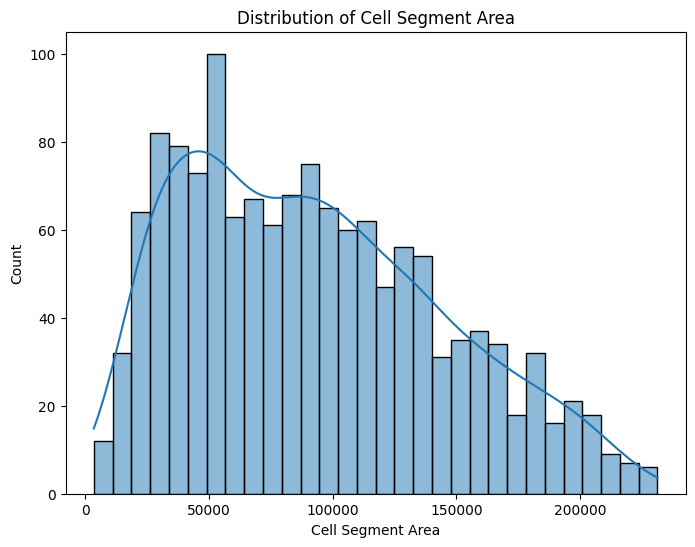

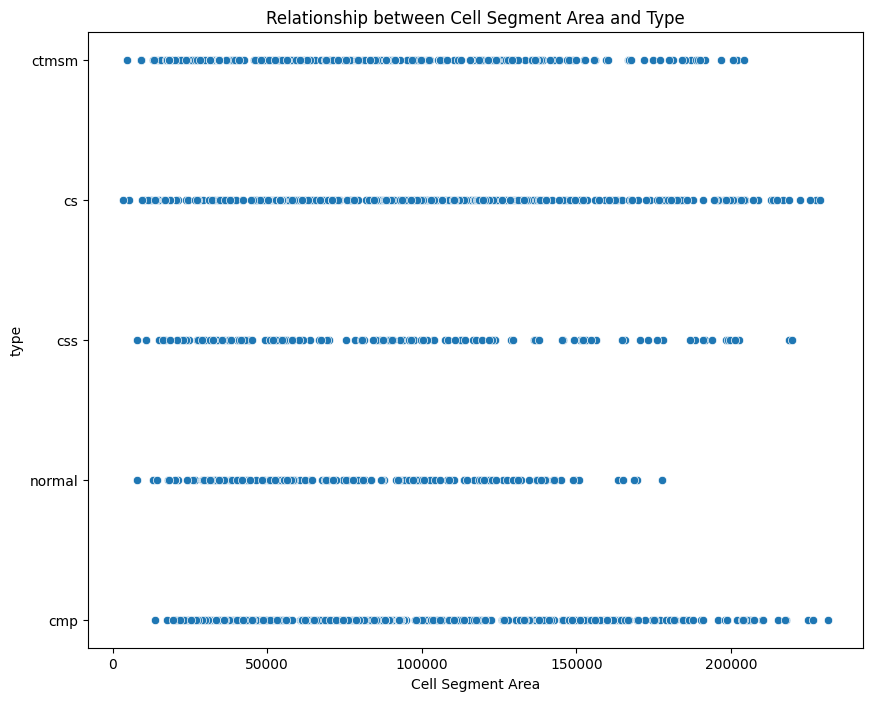

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Distribution of 'Cell Segment Area'
plt.figure(figsize=(8, 6))
sns.histplot(df['Cell Segment Area'], bins=30, kde=True)
plt.title('Distribution of Cell Segment Area')
plt.show()

# Example: Relationship between 'Cell Segment Area' and 'type'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Cell Segment Area', y='type', data=df)
plt.title('Relationship between Cell Segment Area and Type')
plt.show()

#### 2.5. Análise de correlação
Plotamos a matriz de correlação a fim de identificar possíveis relações entre as features.
É notável que muitas features tem correlação alta - isso é esperado, já que diversos pares são complementares - 

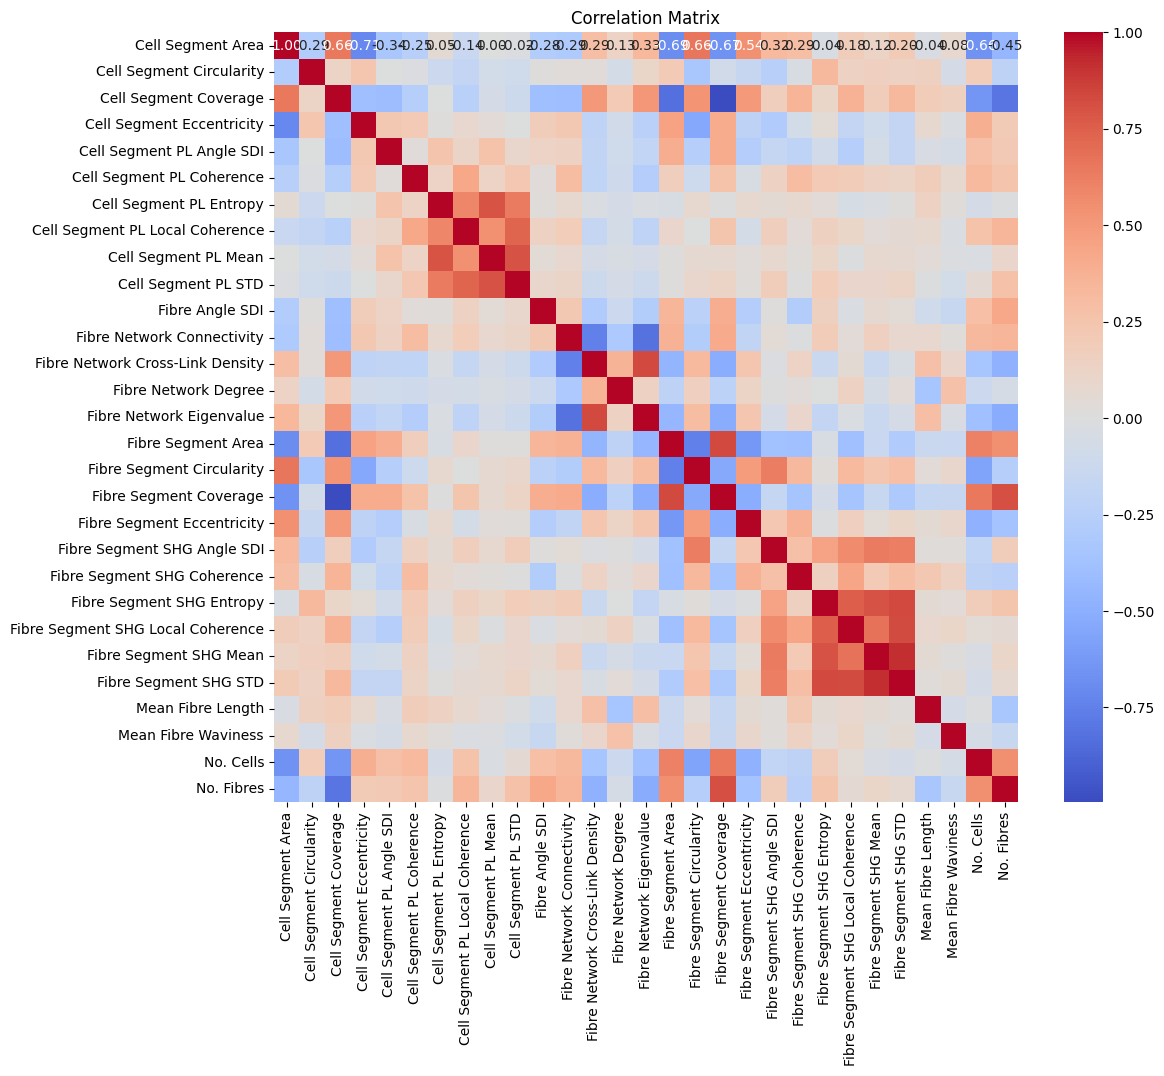

In [7]:
# INICIO CODIGO MANUAL
X = df.drop('type', axis=1)
y = df['type']
## Correlation matrix
#correlation_matrix = df.corr()
correlation_matrix = X.corr()
# FIM CODIGO MANUAL

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


#### 2.6. Pairplots
Para visualizar com mais detalhes as relações entre as features, geramos pairplots de todas elas.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="ticks")

# Create a pairplot with transparency
plt.figure(figsize=(20, 20))
pair_plot = sns.pairplot(df, hue='type', diag_kind='kde', markers=["o", "s"], palette="husl")

# Adjust transparency
for scatter_ax in pair_plot.axes.flat:
    if scatter_ax.has_data():
        scatter_ax.collections[0].set_alpha(0.5)

plt.suptitle('Pairplot of All Features with Transparency', y=1.02)
#plt.show()
# OBS: PAIRPLOT ANEXO COMO JPEG - pairplot.jpg. A FIGURA ESTAVA EM UMA RESOLUCAO QUE SUPERAVA O LIMITE DE TAMANHO DO MOODLE.

#### 2.7. Boxplots
Por fim, geramos boxplots para visualizar as distribuições de cada feature por tipo.

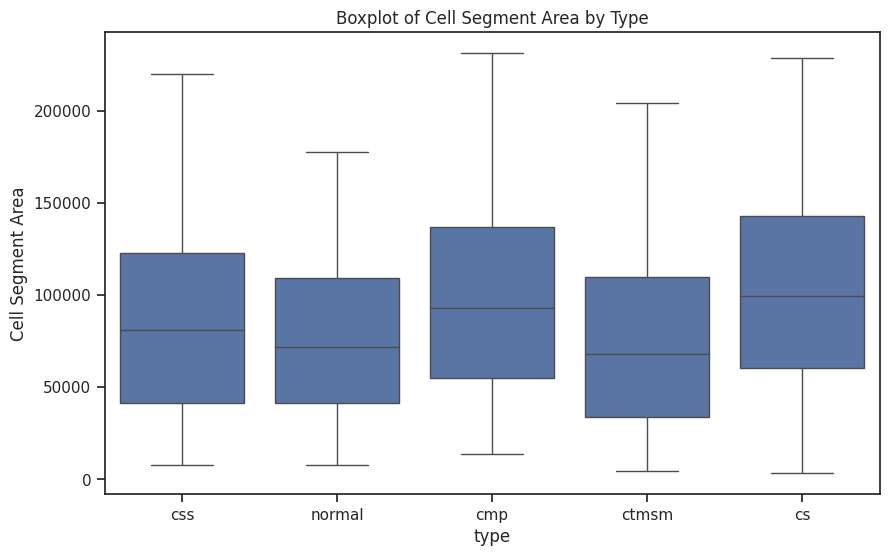

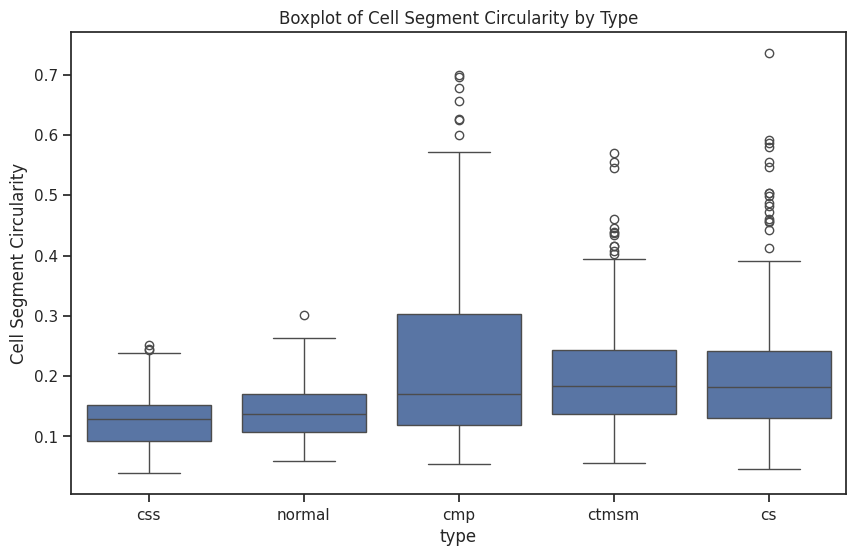

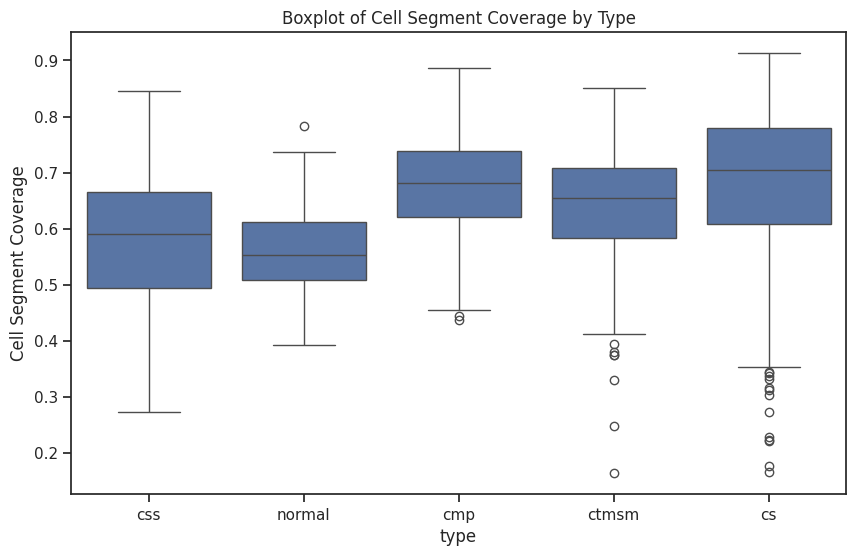

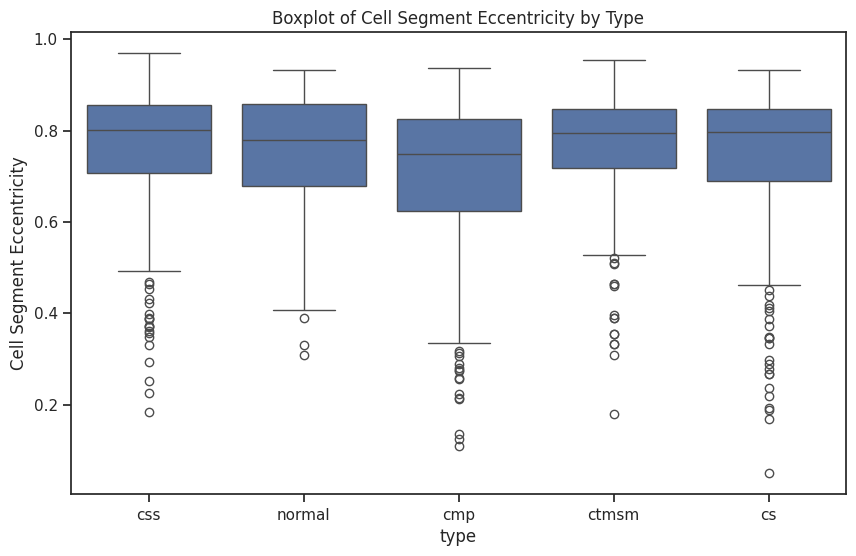

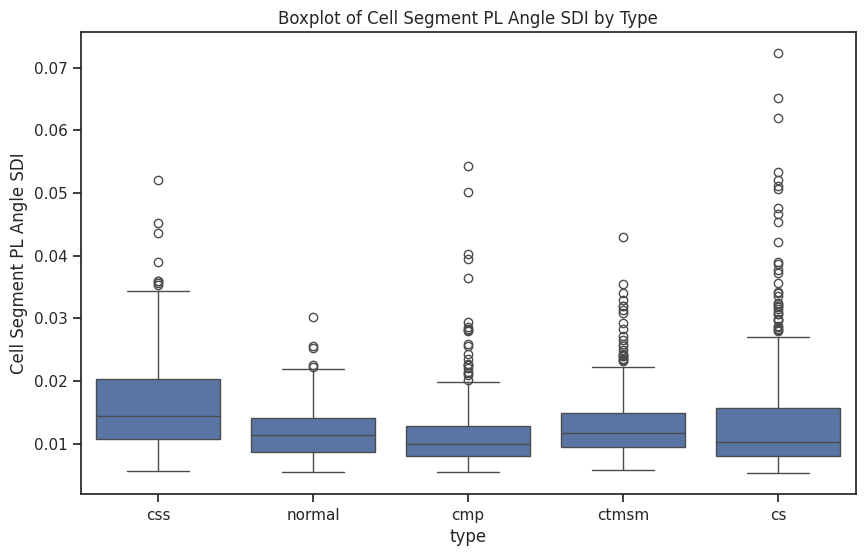

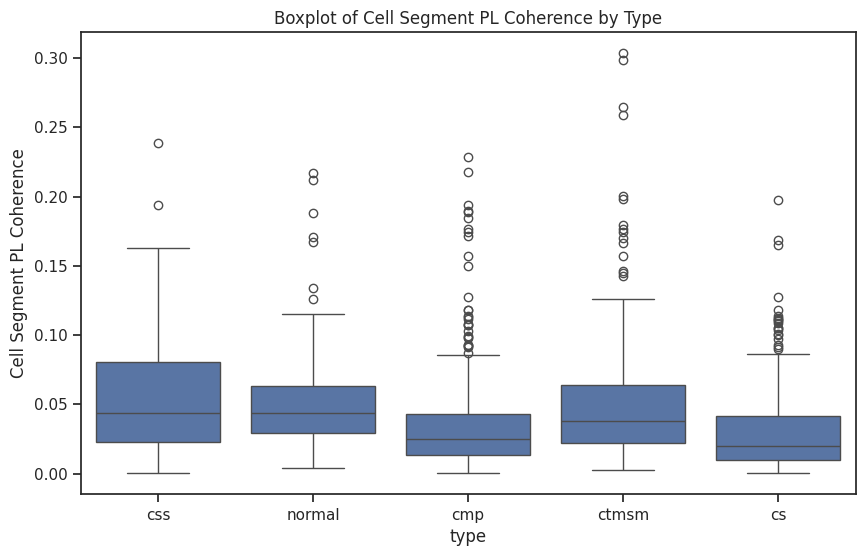

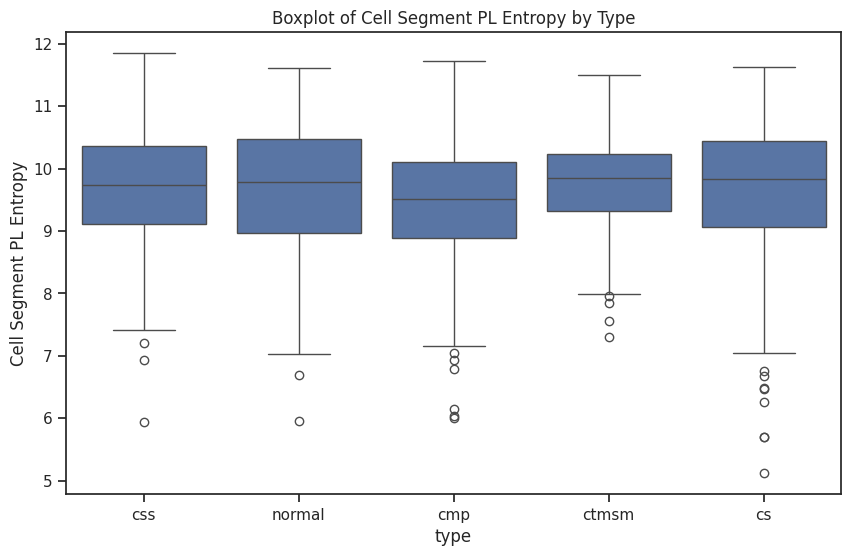

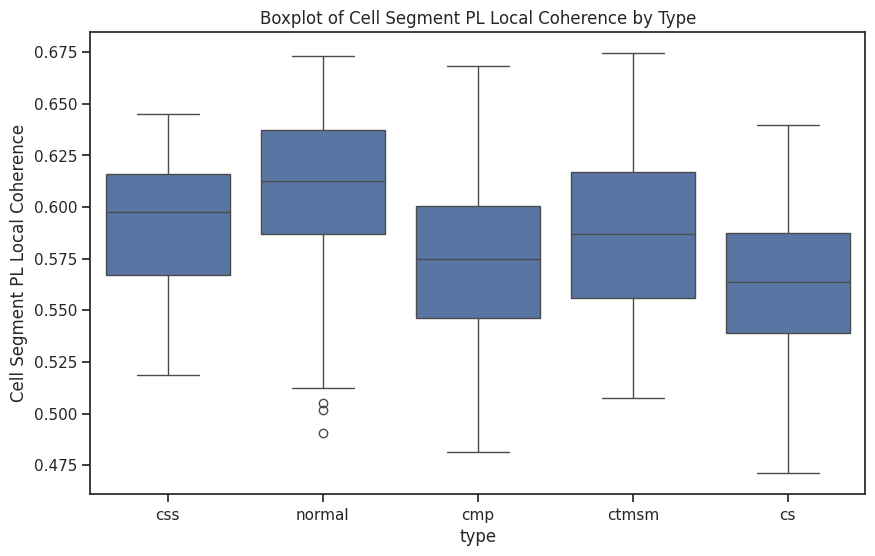

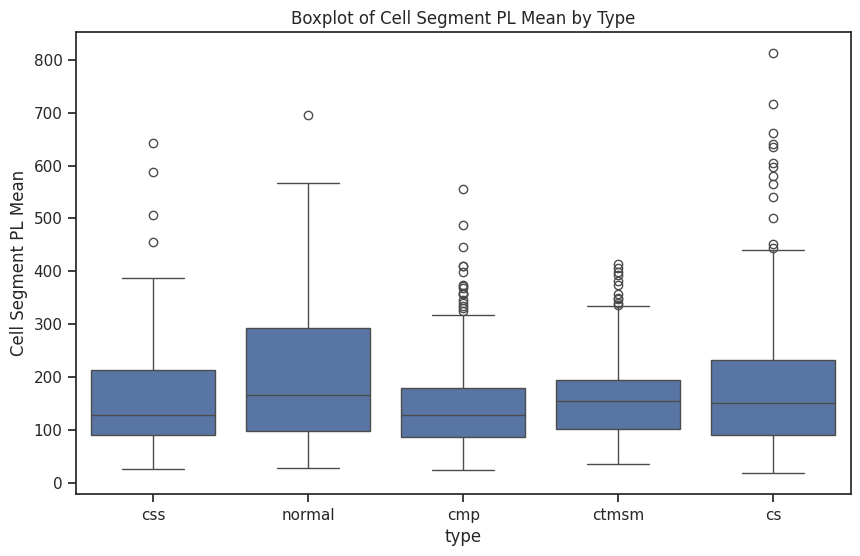

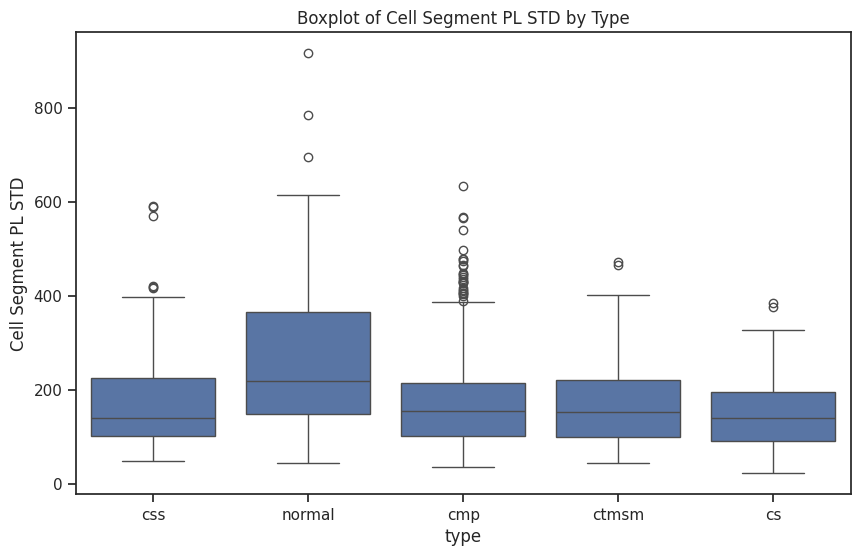

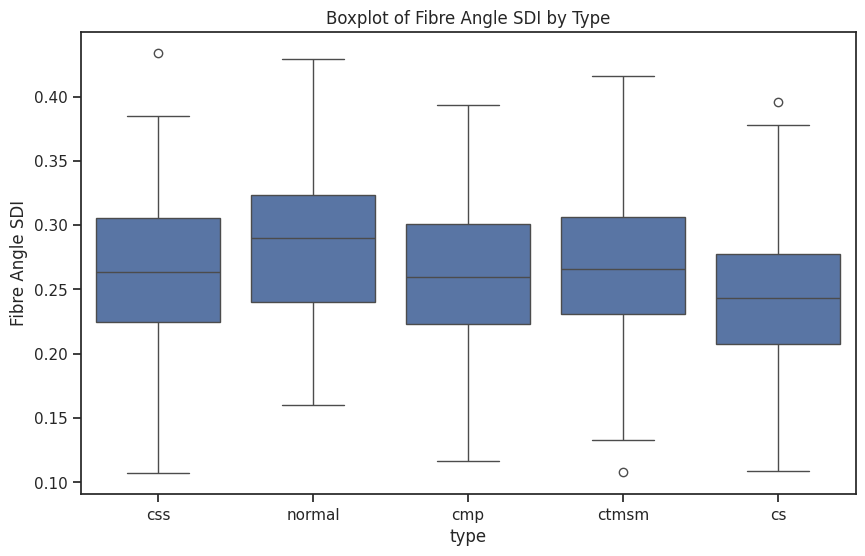

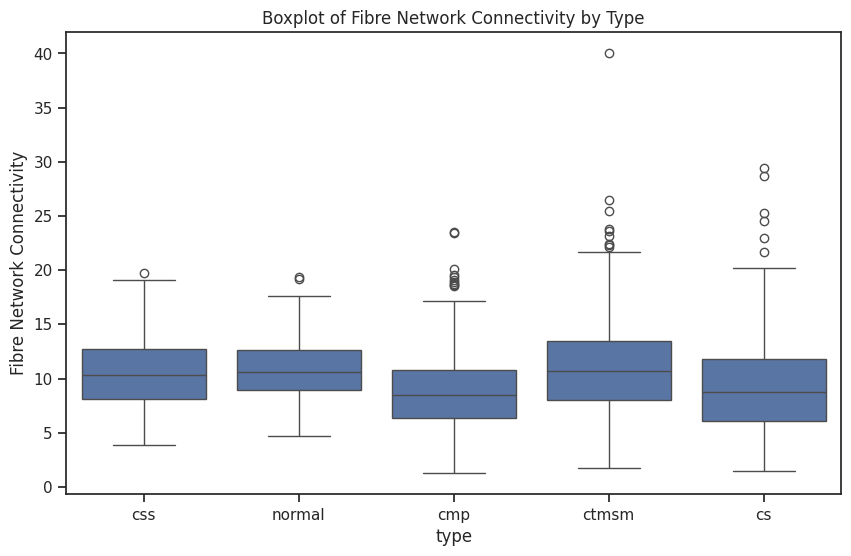

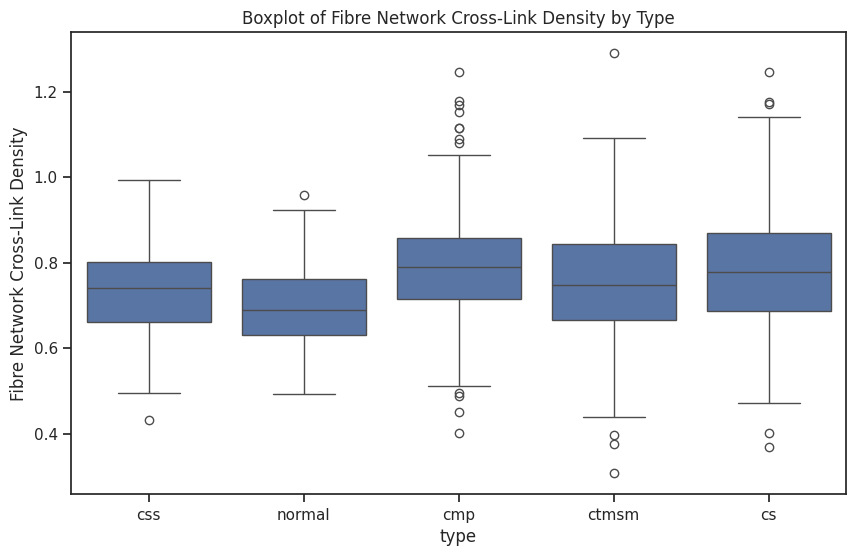

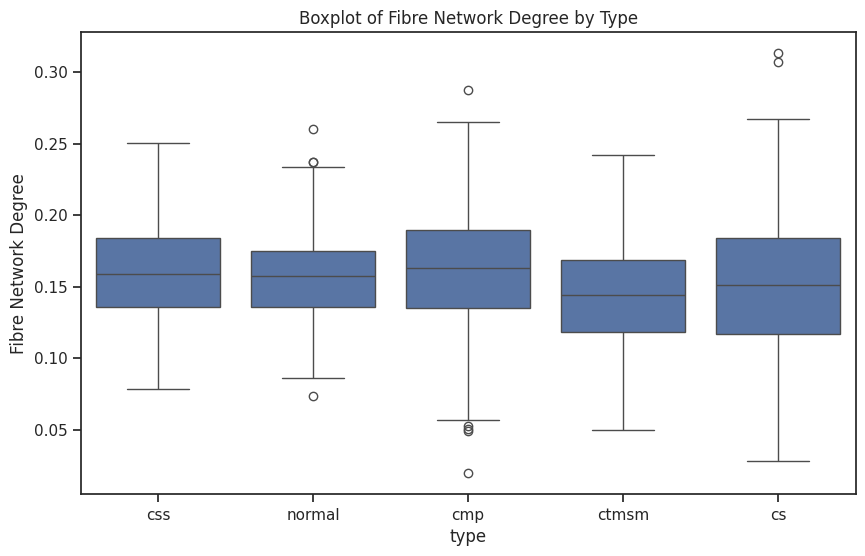

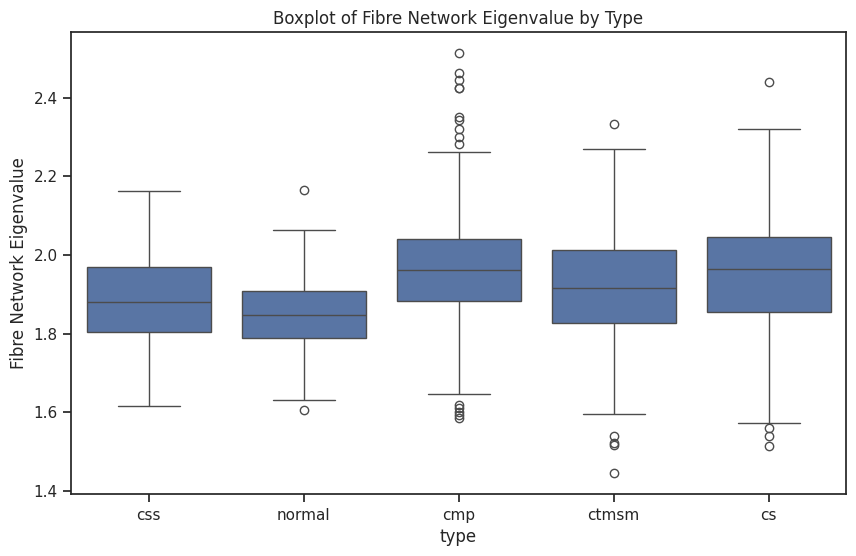

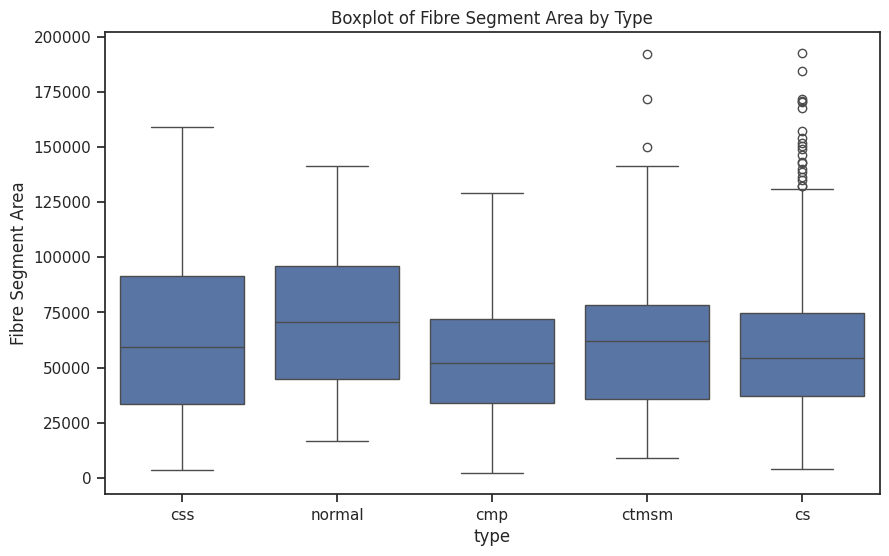

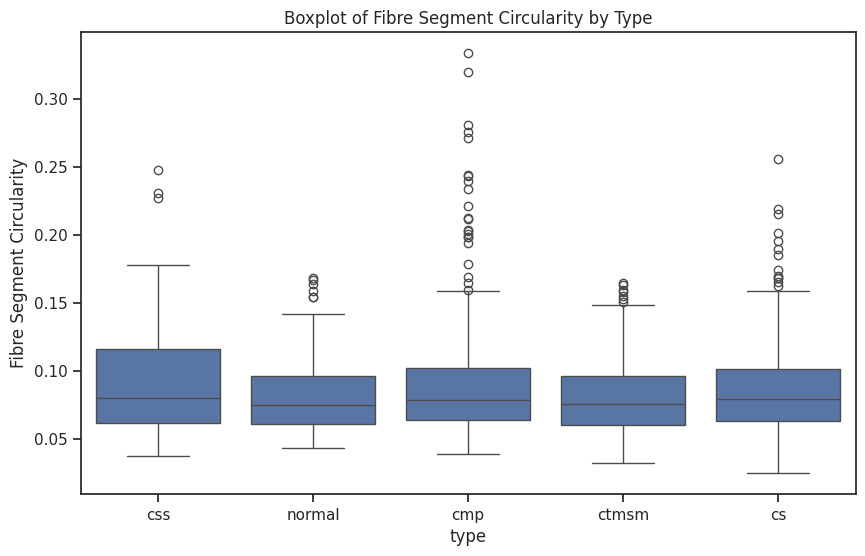

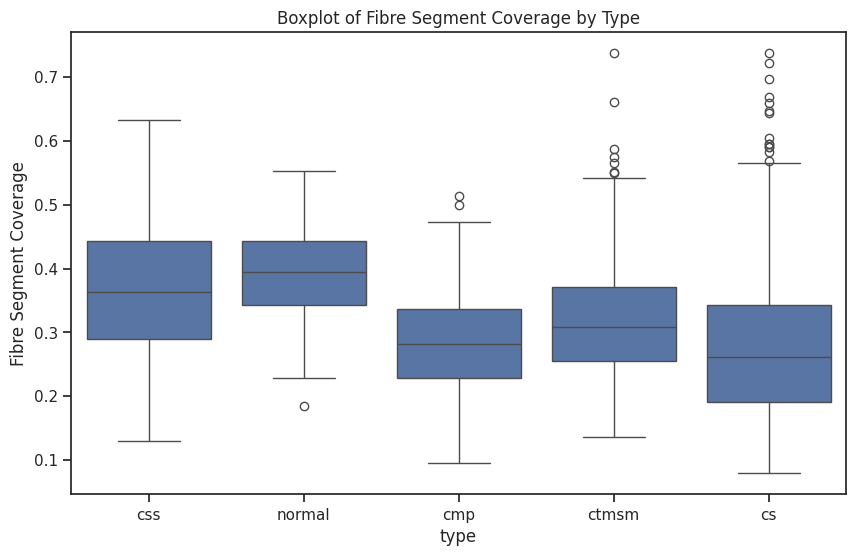

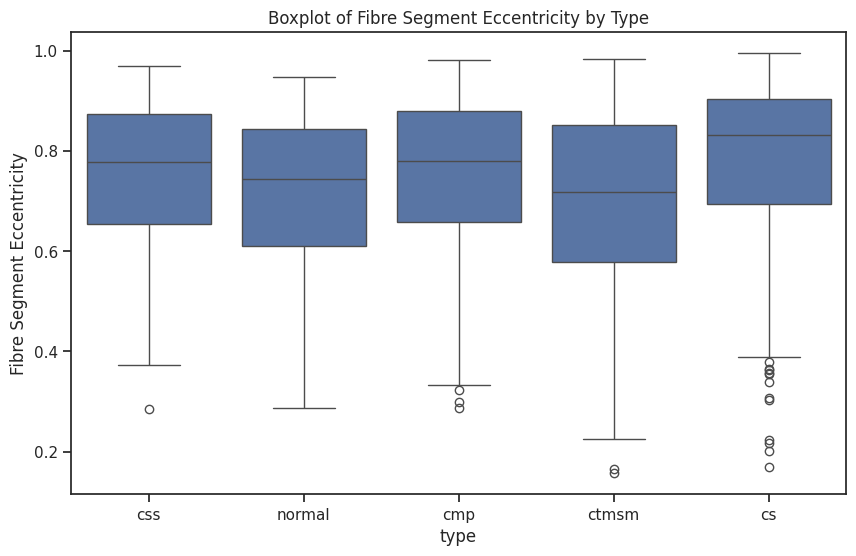

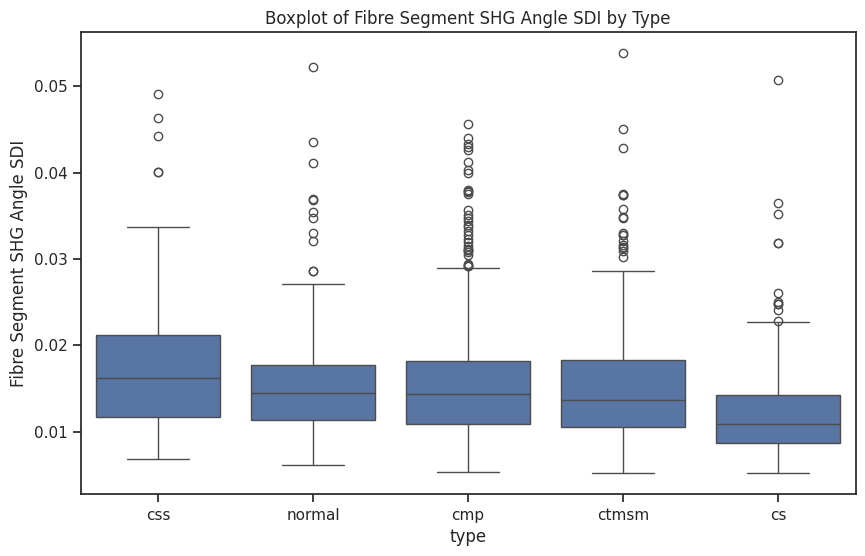

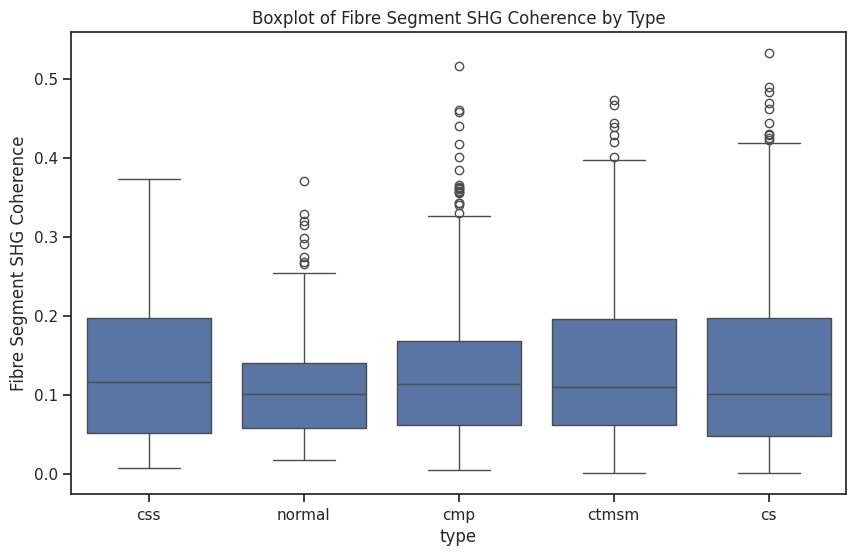

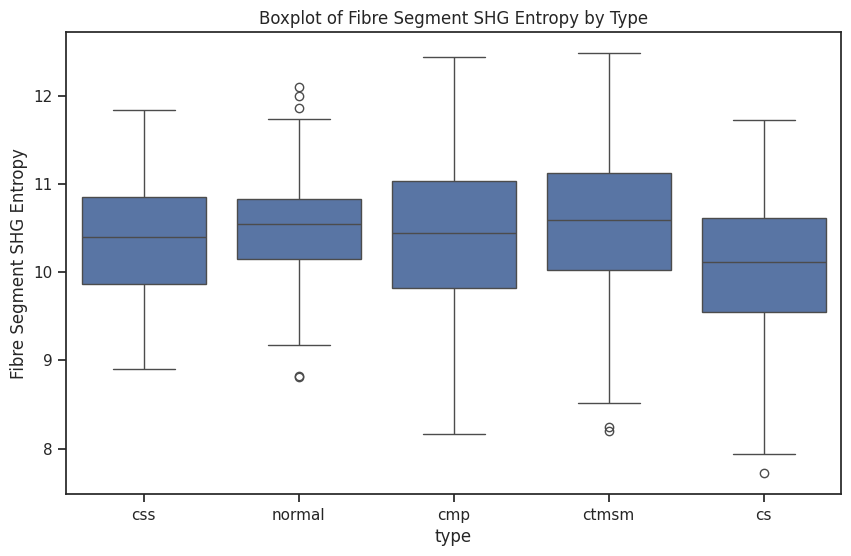

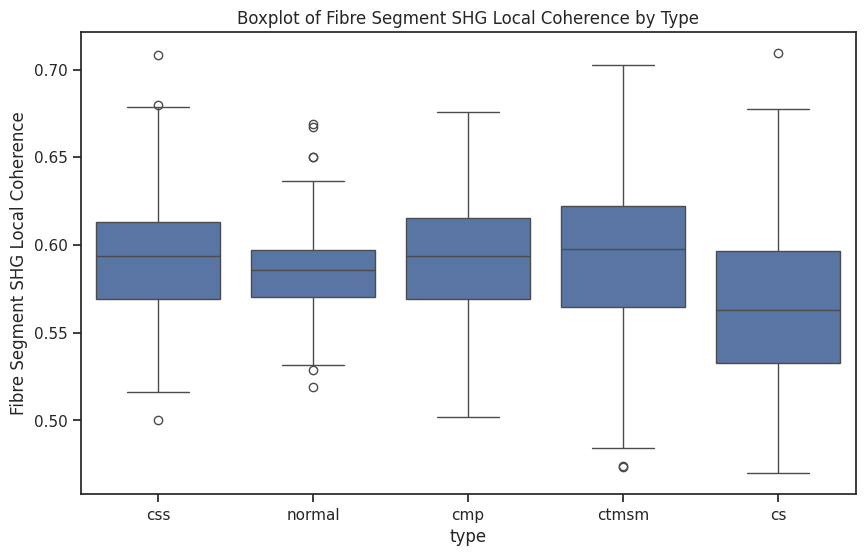

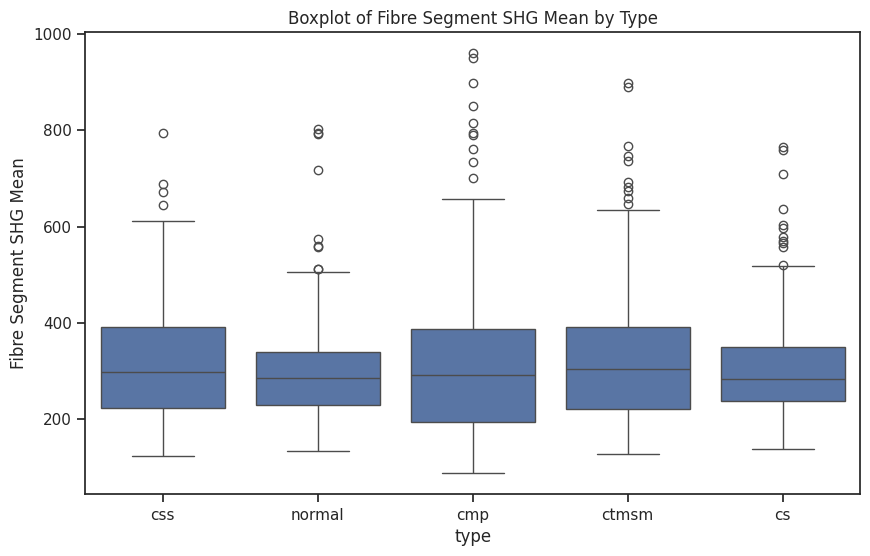

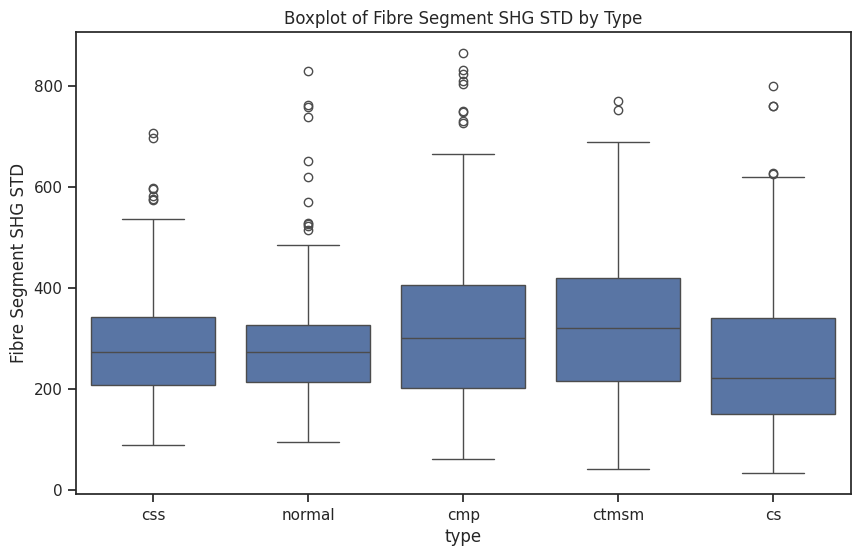

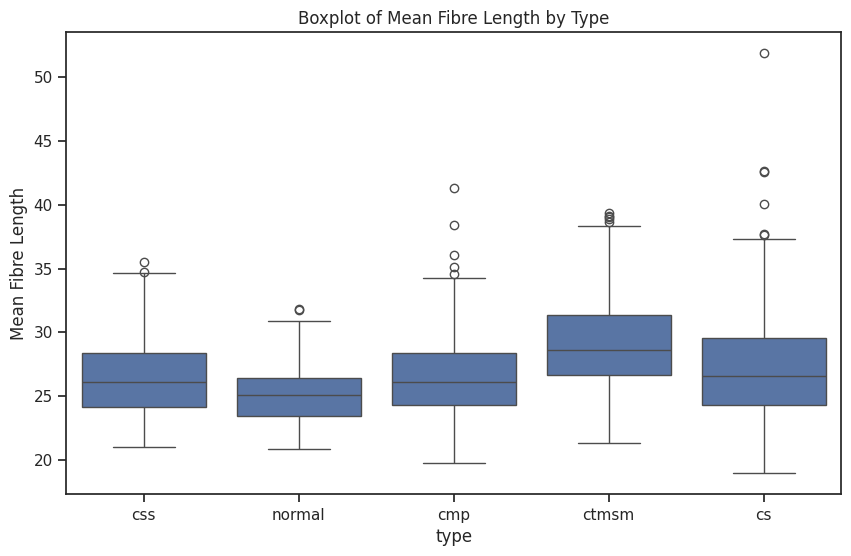

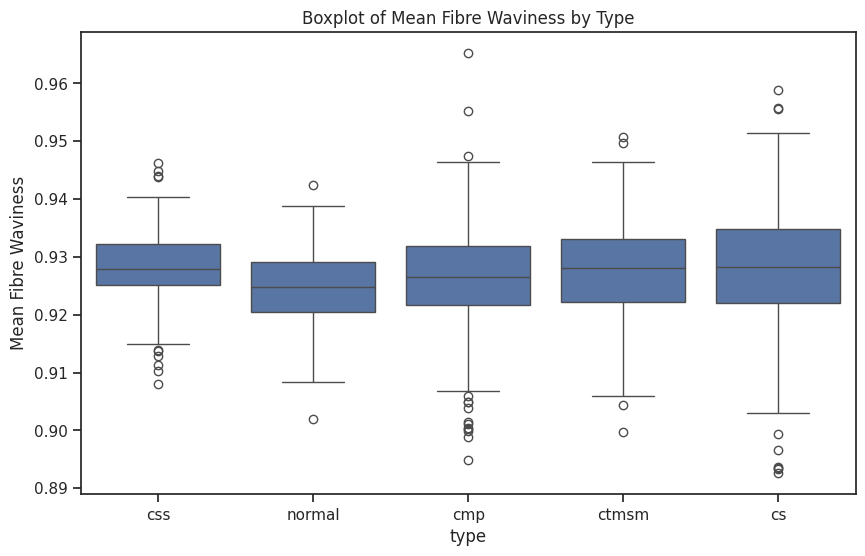

In [9]:
numeric_features = df.select_dtypes(include=['float64']).columns
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='type', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Type')
    plt.show()


## **3. Data preparation (Preparação dos dados)**

Link para a sessão: [OpenAI](https://chat.openai.com/share/3f1aca46-a565-4528-974a-eb222f41a0b4)

In [10]:
from sklearn.utils import resample

# Check the class distribution
print("Class Distribution:\n", df['type'].value_counts())

# Assuming 'type' is your target variable
# Resample to handle class imbalance, adjust strategy based on your specific needs

# CODIGO GERADO

# df_majority = df[df['type'] == 'majority_class']
# df_minority = df[df['type'] == 'minority_class']

# # Upsample the minority class if needed
# df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

# CODIGO MANUAL:
# Fizemos um for para realizar upsampling de todas as classes

df_majority = df[df['type'] == 'cmp']
n_samples=len(df_majority)

for c_type in ['cs', 'ctmsm', 'normal', 'css']:
    df_minority = df[df['type'] == c_type]

    # Upsample the minority class if needed
    df_minority_upsampled = resample(df_minority, replace=True, n_samples=n_samples, random_state=42)

    # Concatenate the majority class with the upsampled minority class
    df_majority = pd.concat([df_majority, df_minority_upsampled])

df = df_majority
# Check the new class distribution
print("Upsampled Class Distribution:\n", df['type'].value_counts())

Class Distribution:
 type
cmp       438
cs        347
ctmsm     290
normal    166
css       143
Name: count, dtype: int64
Upsampled Class Distribution:
 type
cmp       438
cs        438
ctmsm     438
normal    438
css       438
Name: count, dtype: int64


Este dataset tem features com significados diferentes, e as features onde cabe normalização já estão normalizadas, portanto optamos por pular esta etapa.

Também não fizemos encoding, pois não é necessário nessa tarefa.

Preferimos por fazer upsampling de todas as classes, e não remover outliers. Por se tratar de um problema envolvendo câncer, pontos fora da curva normal são de grande importância. 

Por fim, deixamos para fazer o data splitting na etapa de modelagem, para que seja feito um cross-validation.

## **4. Modeling**

Link para a sessão: [OpenAI](https://chat.openai.com/share/def57957-772e-4c4d-bb54-8ef7541e80b8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2190 entries, 309 to 139
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Cell Segment Area                  2190 non-null   float64
 1   Cell Segment Circularity           2190 non-null   float64
 2   Cell Segment Coverage              2190 non-null   float64
 3   Cell Segment Eccentricity          2190 non-null   float64
 4   Cell Segment PL Angle SDI          2190 non-null   float64
 5   Cell Segment PL Coherence          2190 non-null   float64
 6   Cell Segment PL Entropy            2190 non-null   float64
 7   Cell Segment PL Local Coherence    2190 non-null   float64
 8   Cell Segment PL Mean               2190 non-null   float64
 9   Cell Segment PL STD                2190 non-null   float64
 10  Fibre Angle SDI                    2190 non-null   float64
 11  Fibre Network Connectivity         2190 non-null   float64
 

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
X = df.drop('type', axis=1)  # Features
y = df['type']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Example classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    #'K-Nearest Neighbors': KNeighborsClassifier(), #INTERVENCAO MANUAL: KNN NAO FUNCIONOU - retornava erros, NaN, etc
    'Logistic Regression': LogisticRegression()
}

In [14]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

def evaluate_classifier(classifier, X_train, y_train, cv=5):
    # Perform cross-validation
    y_pred = cross_val_predict(classifier, X_train, y_train, cv=cv)

    # Print classification report for detailed metrics
    report = classification_report(y_train, y_pred)

    print(f'Metrics for Classifier:\n{name}\n\nClassification Report:\n{report}')

for name, classifier in classifiers.items():
    evaluate_classifier(classifier, X_train, y_train)
    print('\n' + '='*50 + '\n')

Metrics for Classifier:
Random Forest

Classification Report:
              precision    recall  f1-score   support

         cmp       0.74      0.68      0.71       342
          cs       0.86      0.84      0.85       356
         css       0.91      0.94      0.92       348
       ctmsm       0.84      0.84      0.84       360
      normal       0.89      0.96      0.93       346

    accuracy                           0.85      1752
   macro avg       0.85      0.85      0.85      1752
weighted avg       0.85      0.85      0.85      1752



Metrics for Classifier:
Support Vector Machine

Classification Report:
              precision    recall  f1-score   support

         cmp       0.20      0.08      0.12       342
          cs       0.27      0.46      0.34       356
         css       0.32      0.07      0.11       348
       ctmsm       0.31      0.44      0.37       360
      normal       0.30      0.38      0.33       346

    accuracy                           0.29      1

Aqui, vemos que o Random Forest teve uma performance bem melhor que o SVC e a regressão logística. Não utilizamos o KNN pois estava retornando diversos erros.

Portanto, escolhemos o Random Forest para prosseguir nas próximas etapas.

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier with your preferred parameters
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the entire training dataset
random_forest_classifier.fit(X_train, y_train)

# Now, the classifier is trained and ready for further use

# Optionally, you can evaluate the performance on the test set
y_pred_test = random_forest_classifier.predict(X_test)

# Print classification report for the test set
report_test = classification_report(y_test, y_pred_test)
print('Classification Report for Test Set:\n', report_test)

Classification Report for Test Set:
               precision    recall  f1-score   support

         cmp       0.79      0.76      0.78        96
          cs       0.91      0.90      0.91        82
         css       0.94      0.98      0.96        90
       ctmsm       0.87      0.79      0.83        78
      normal       0.89      0.97      0.93        92

    accuracy                           0.88       438
   macro avg       0.88      0.88      0.88       438
weighted avg       0.88      0.88      0.88       438



## **5. Evaluation**

Link para a sessão: [OpenAI](https://chat.openai.com/share/aa5c628a-2390-4fac-816f-5f671dc66bdd)

In [43]:
### INICIO CODIGO MANUAL, APENAS PARA A MATRIZ DE CONFUSAO **

labels = y_test.unique()
labels.sort()

### FIM CODIGO MANUAL

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Supondo que random_forest_classifier já está treinado

# Fazendo previsões no conjunto de teste
y_pred = random_forest_classifier.predict(X_test)

# Avaliação usando métricas comuns
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)
class_report = classification_report(y_test, y_pred)

# Exibindo os resultados
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy: 0.8812785388127854

Confusion Matrix:
 [[73  4  3  7  9]
 [ 5 74  1  1  1]
 [ 2  0 88  0  0]
 [10  3  2 62  1]
 [ 2  0  0  1 89]]

Classification Report:
               precision    recall  f1-score   support

         cmp       0.79      0.76      0.78        96
          cs       0.91      0.90      0.91        82
         css       0.94      0.98      0.96        90
       ctmsm       0.87      0.79      0.83        78
      normal       0.89      0.97      0.93        92

    accuracy                           0.88       438
   macro avg       0.88      0.88      0.88       438
weighted avg       0.88      0.88      0.88       438



**Observação: omiti linhas de código que foram repetidas em relação ao prompt anterior**

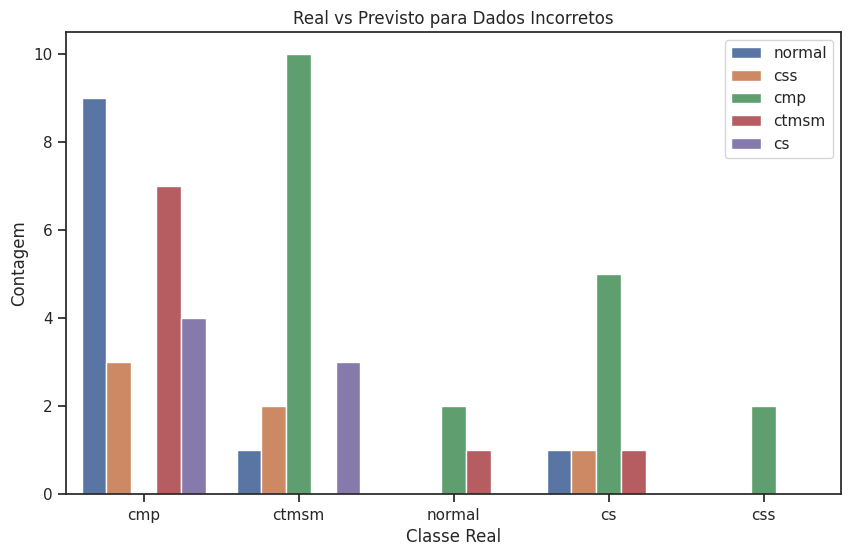

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


# Obtendo índices dos erros
errors = (y_pred != y_test)

# Filtrando os dados de teste relacionados a erros
X_errors = X_test[errors]
y_errors = y_test[errors]
y_pred_errors = y_pred[errors]

# Criando um gráfico de barras para visualizar as classes reais e previstas dos erros
plt.figure(figsize=(10, 6))
sns.countplot(x=y_errors, hue=y_pred_errors)
plt.title('Real vs Previsto para Dados Incorretos')
plt.xlabel('Classe Real')
plt.ylabel('Contagem')
plt.show()


**Comentário: Esse gráfico ajuda a ver visualmente quais classes foram "trocadas" na classificação**

Depois de tudo, percebemos que o upsampling deveria ter sido feito somente nos dados de treino. Fica o aprendizado!

In [47]:
### INICIO CODIGO MANUAL
params = {"xticklabels":labels, "yticklabels":labels}
# Esses params serao injetados na matriz de confusao abaixo para melhor visualizacao
### FIM CODIGO MANUAL

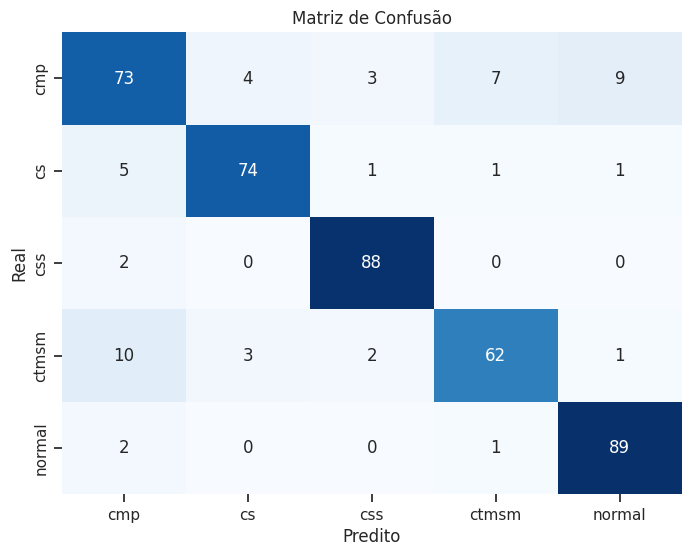

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Plota a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, **params) # Params injetados manualmente
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()


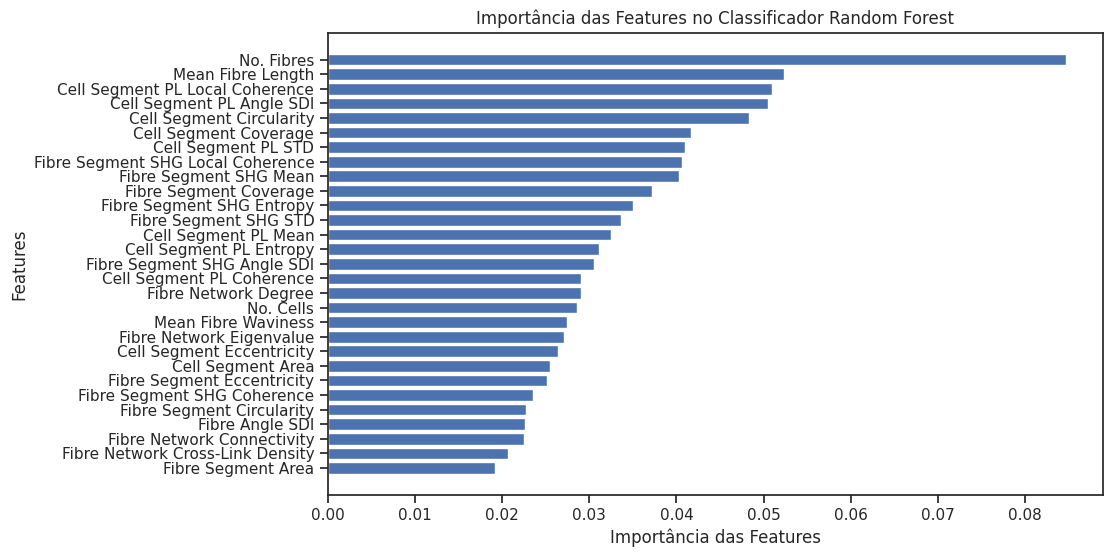

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Obtendo a importância das features do classificador Random Forest
feature_importance = random_forest_classifier.feature_importances_

# Obtendo o nome das features (usando índices das colunas de X_test)
feature_names = X_test.columns

# Ordenando as features com base em sua importância
indices = np.argsort(feature_importance)

# Plotando as importâncias das features em um gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), feature_importance[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Importância das Features")
plt.ylabel("Features")
plt.title("Importância das Features no Classificador Random Forest")
plt.show()


**Observação**: na linha df = pd.DataFrame(data=X_test, columns=selected_features), o chatGPT havia colocado uma variável "seu_nome_de_features" enganadamente, pois essa variável não existe. Provavelmente isso foi ocasionado como resquício dos prompts anteriores. A variável no código abaixo foi manualmente substituída pela correta (selected_features). Vale observar que a variável selected_features ja estava sendo corretamente instanciada no output do chatGPT.

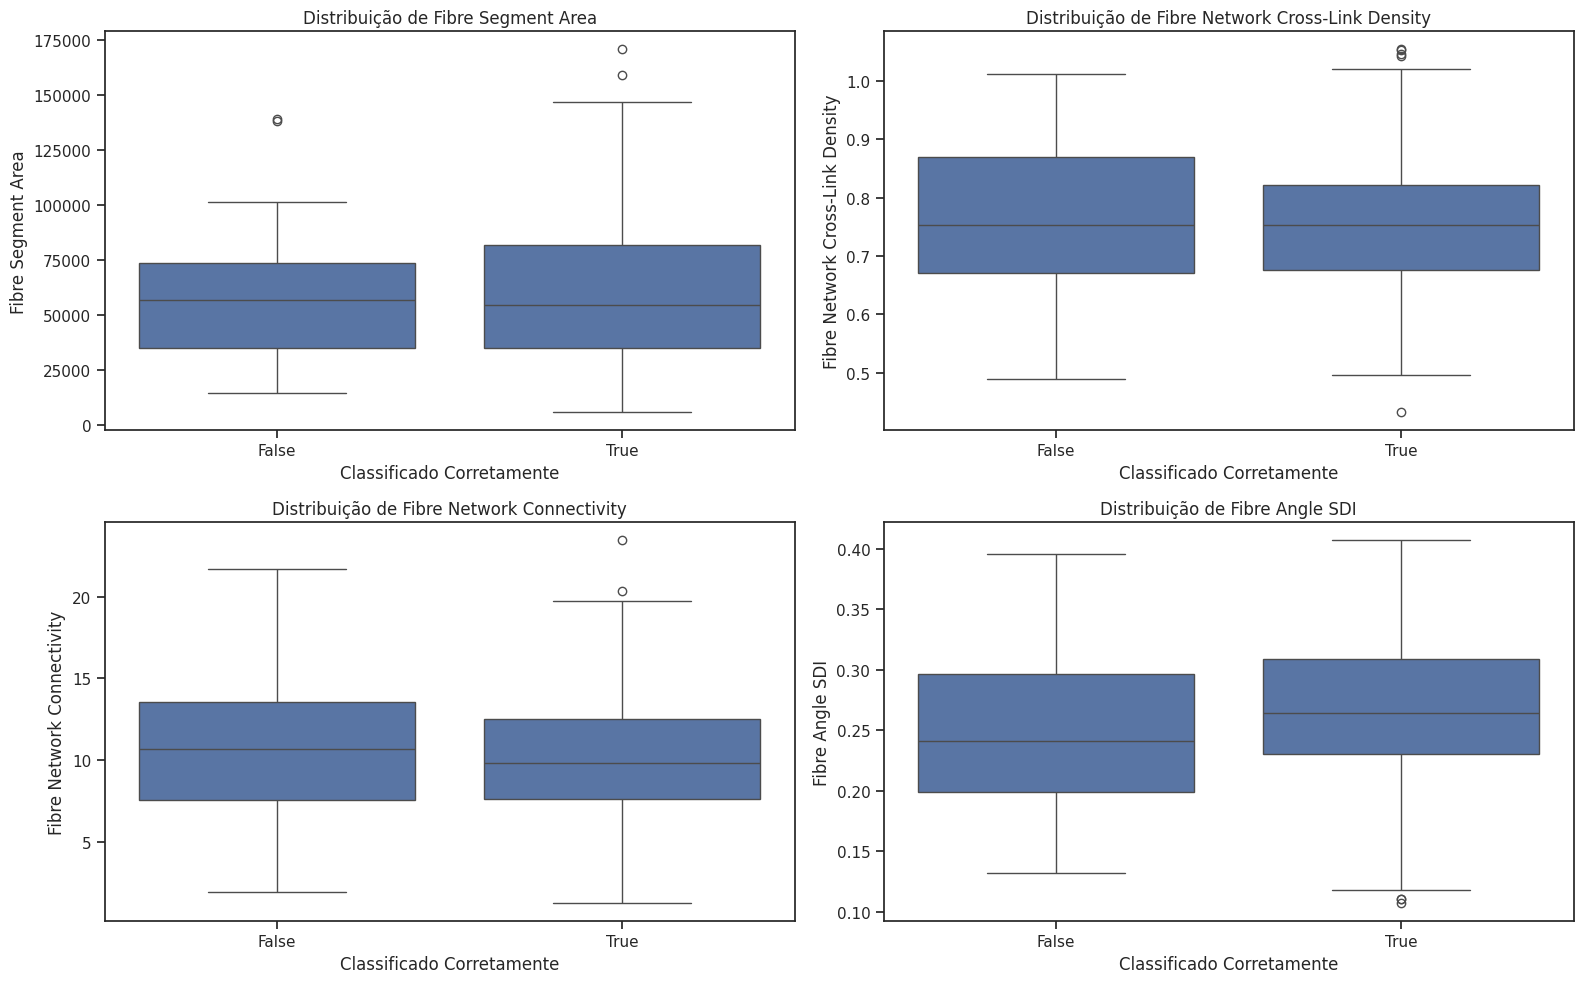

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Selecione as quatro features mais importantes
selected_features = ['Fibre Segment Area', 'Fibre Network Cross-Link Density', 'Fibre Network Connectivity', 'Fibre Angle SDI']

# Crie um DataFrame com os dados de teste e as previsões
df = pd.DataFrame(data=X_test, columns=selected_features)
df['Real'] = y_test
df['Predito'] = y_pred

# Adicione uma coluna para indicar se a amostra foi classificada corretamente ou não
df['Classificado Corretamente'] = ~errors

# Plote boxplots para as quatro features mais importantes
plt.figure(figsize=(16, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Classificado Corretamente', y=feature, data=df)
    plt.title(f'Distribuição de {feature}')
    plt.xlabel('Classificado Corretamente')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()
